In [ ]:
# CNN Convolutional Neural Network 卷积神经网络


## 图像操作基础

通道

一个图片是由颜色、像素点、像素点深浅度构成
，每一个像素都有深浅度，可以用数值表达例如[2]
像素点在二维空间上的位置就注册了矩阵。但此时图像还是一个黑白图像（灰度图）。
而色彩是由三色（红黄蓝）构成，每一个色彩作为一个颜色层，每一个颜色层具有像素点与像素深浅度（数值）
三色图叠加在一起就组成了彩色图片。

---

参考

* [深度学习NCHW和NHWC数据格式（由三维数据转换成一维数据的遍历方式）](https://dontla.blog.csdn.net/article/details/123141775?spm=1001.2101.3001.6650.1&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-123141775-blog-108960632.pc_relevant_recovery_v2&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-123141775-blog-108960632.pc_relevant_recovery_v2&utm_relevant_index=2)
* [https://blog.csdn.net/m0_37673307/article/details/81271155](https://blog.csdn.net/m0_37673307/article/details/81271155)

---

### 图像的基本处理
> 基于Opencv包，




In [2]:
!pip install opencv-python -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/38.2 MB 4.3 MB/s eta 0:00:09
     ---------------------------------------- 0.3/38.2 MB 4.2 MB/s eta 0:00:10
      --------------------------------------- 0.7/38.2 MB 5.8 MB/s eta 0:00:07
     - -------------------------------------- 1.3/38.2 MB 7.3 MB/s eta 0:00:06
     - -------------------------------------- 1.8/38.2 MB 8.2 MB/s eta 0:00:05
     -- ------------------------------------- 2.4/38.2 MB 8.8 MB/s eta 0:00:05
     --- ------------------------------------ 2.9/38.2 MB 9.2 MB/s eta 0:00:04
     --- ------------------------------------ 3.4/38.2 MB 9.5 MB/s eta 0:00:04
     ---- ----------------------------------- 4.0/38.2 MB 9.7 MB/s eta 0:00:04
     ---- ----------------------------------- 4.5/38.2 MB 9.9 MB/s eta 0:00:04
     ----- ---------------------------------- 5.0/38.2 MB 10.0 MB/s eta 0:00:

### opencv的基本操作

OpenCV的全称是Open Source Computer Vision Library，是一个跨平台的电脑视觉库。OpenCV是由英特尔公司发起并参与开发，以BSD许可证授权发行，可以在商业和研究领域中免费使用。OpenCV可用于开发实时的图像处理、电脑视觉以及模式识别程序。该程序库也可以使用英特尔公司的IPP进行加速处理。

figs\batch norm4.jp

---

1. 图形的灰度、彩色读取

openCV默认采用BGR（蓝绿红）格式，而matplotlib等多采用RGB格式，故需要转换

```python
    img_rgb=cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)

```

2. 图片的保存

图片读取、转换后格式保存本地后转换格式保留。例如灰度读取，保存后将变为灰度

cv2读取图像后，得到的数据类型为：<class 'numpy.ndarray'>,形状为(797, 1275)
灰度图读取，显示：


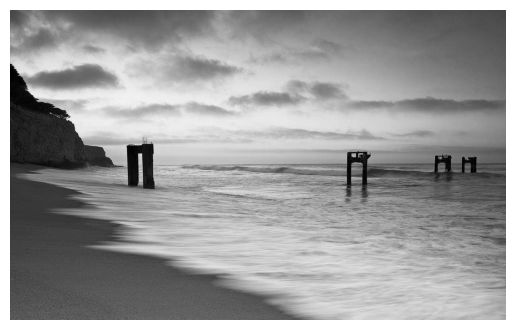

转换RGB后再显示：
图像数组对应shape (797, 1275, 3)


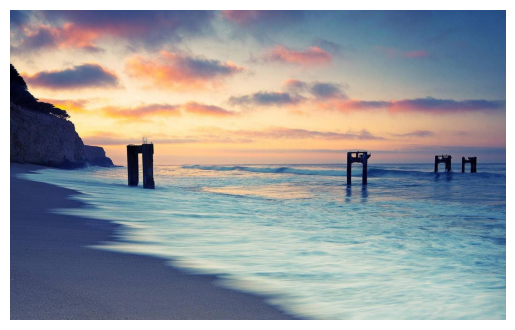

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    cv2.__version__
    file='pics/bridge.jpg'
    img_gray=cv2.imread(file,cv2.IMREAD_GRAYSCALE)#读取为灰度图
    print("cv2读取图像后，得到的数据类型为：{},形状为{}".format(type(img_gray),img_gray.shape))
    plt.imshow(img_gray,cmap="gray")#plt中通过cmp制定显示的是灰度,否则显示出错
    plt.axis("off")
    print("灰度图读取，显示：")
    plt.show()
    ################################################################
    img_color =cv2.imread(file,cv2.IMREAD_COLOR)

    plt.imshow(img_color )
    print("转换RGB后再显示：")
    img_rgb=cv2.cvtColor(img_color,cv2.COLOR_BGR2RGB)
    print("图像数组对应shape",img_rgb.shape)
    plt.axis("off")
    plt.imshow(img_rgb)
    cv2.imwrite("pics/img_gray.jpg",img_gray)

图片与numpy的转换

图片能被机器学习算法所处理，最基本的步骤就是处理成计算机所能读写的格式，最基本通用的格式即numpy数组。

可以通过cv2对图像进行大小，规范、提升批处理图像。包括

1. 改变图像大小（调整像素）
调整图像时图像处理的常见任务。在数据分析中，原始图像形状大小不同，但被机器学习时往往必须有相同大小（像素数）。

但图像大小的标准化也会带来一些信息上的损失，由于图像时包含信息的矩阵，当减少图像像素后，矩阵大小也会缩小，信息量也会变小。

同时图像改变也可以减轻机器学习时内存的压力。

机器学习中常见图像规格包括：$32 \times 32, 64 \times 64, 96 \times 96, 256 \times 256$

可以通过numpy.flatten()将二维的灰度图摊平，从而进行计算，例如在之前深度学习中载入全连接层时，为了使得输入为二维矩阵（bitch，img）形式，img就是摊平图像形成的向量

2. 色彩通道设置
> 色彩通道时cnn重点概念

彩色图像的像素不是用一个值（例如25*25）表示，而是用多个值（常用3个），分别表示每个通道（红，绿，蓝等）的强度，这些色彩分量混合后可以

表示对应像素点的颜色。例如彩色32*32图所有的特征值（为3*32*32=3072）

3. 多通道颜色
[使用python opencv 对图像通道的基本操作](https://blog.csdn.net/m0_56497861/article/details/116422179)

Split()函数可以拆分图像的通道，例如BGR图像的三个通道，一般常见调用格式如下：
```python
b,g,r=cv2.split(img)
```
其中：

     b,g,r分别是B通道、G通道、R通道的图像信息。

     img是要拆分的图像。
同时通过merge还可以将不同通道色彩合并。
```python
Imagebgr=cv2.merge([b,g,r])
```

灰度图的图像类型为:<class 'numpy.ndarray'>，格式为：(32, 32)
彩色图的图像类型为:<class 'numpy.ndarray'>，格式为：(32, 32, 3)，格式为
摊平32*32灰度图,摊平后的向量形状为：{} (1024,)
转化为矩阵形状: (1, 1024)
32*32彩色图片所有值的数量： 3072
B 通道shape：(1050, 700)；R 通道shape:(1050, 700);G 通道shape:(1050, 700)


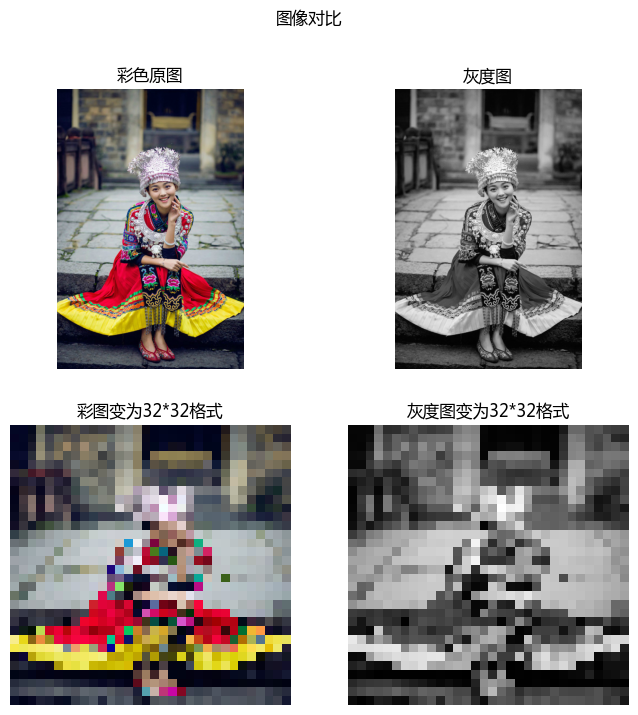

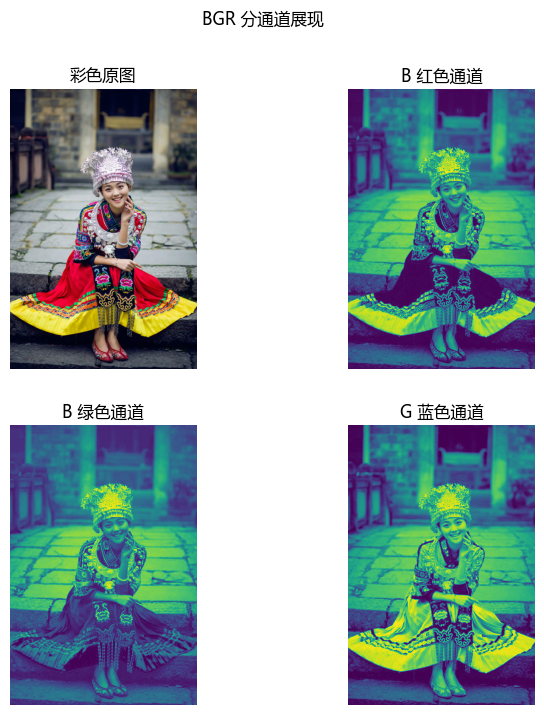

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
from matplotlib.font_manager import FontProperties
import os

if __name__ == '__main__':
    ########################彩图、灰度图变为32*32格式########################################
    file='pics/girl.jpg'
    
    img_c=cv2.imread(file,cv2.IMREAD_COLOR)
    img_rgb=cv2.cvtColor(img_c,cv2.COLOR_BGR2RGB)
    img_32_c=cv2.resize(img_rgb,(32,32))
 
    img_gray=cv2.imread(file,cv2.IMREAD_GRAYSCALE)
    img_32=cv2.resize(img_gray,(32,32))
 
    #############################图像展现###################################
    myfont=FontProperties(fname=r"pics/微软雅黑.ttf",size=12)
    #创建figure对象以及对象包含的多个子图
    fig2,axes2=plt.subplots(2,2)
    fig2.set_size_inches(8,8)
    fig2.suptitle("图像对比",fontproperties=myfont)

    ax1=axes2[0,0]
    ax1.axis("off")
    ax1.set_title("彩色原图",fontproperties=myfont)# 给第一个图副值titile
    ax1.imshow(img_rgb)

    ax2=axes2[1,0]
    ax2.axis("off")
    ax2.set_title("彩图变为32*32格式",fontproperties=myfont)
    ax2.imshow(img_32_c)
    
    ax3=axes2[0,1]
    ax3.axis("off")
    ax3.set_title("灰度图",fontproperties=myfont)
    ax3.imshow(img_gray,cmap='gray')

    ax4=axes2[1,1]
    ax4.axis("off")
    ax4.set_title("灰度图变为32*32格式",fontproperties=myfont)
    ax4.imshow(img_32,cmap='gray')

    #############################图像格式###################################
    print("灰度图的图像类型为:{}，格式为：{}".format(type(img_32),img_32.shape))
    print("彩色图的图像类型为:{}，格式为：{}，格式为".format(type(img_32_c),img_32_c.shape))
    print("摊平32*32灰度图,摊平后的向量形状为：{}",img_32.flatten().shape)
    print("转化为矩阵形状:",img_32.flatten().reshape(1,-1).shape)
    print("32*32彩色图片所有值的数量：",len(img_32_c.flatten()))
    ##############################多通道彩图##################################
    img_b,img_r,img_g=cv2.split(img_c)#拆分不同通道子图像
    fig3,axes3=plt.subplots(2,2)
    fig3.set_size_inches(8,8)
    fig3.suptitle("BGR 分通道展现",fontproperties=myfont)

    ax1=axes3[0,0]
    ax1.axis("off")
    ax1.set_title("彩色原图",fontproperties=myfont)# 给第一个图副值titile
    ax1.imshow(img_rgb)

    ax2=axes3[1,0]
    ax2.axis("off")
    ax2.set_title("B 绿色通道",fontproperties=myfont)
    ax2.imshow(img_b)
    
    ax3=axes3[0,1]
    ax3.axis("off")
    ax3.set_title("R 红色通道",fontproperties=myfont)
    ax3.imshow( img_r)

    ax4=axes3[1,1]
    ax4.axis("off")
    ax4.set_title("G 蓝色通道",fontproperties=myfont)
    ax4.imshow(img_g)
    
    print("B 通道shape：{}；R 通道shape:{};G 通道shape:{}".format(img_b.shape,img_r.shape,img_g.shape))
    

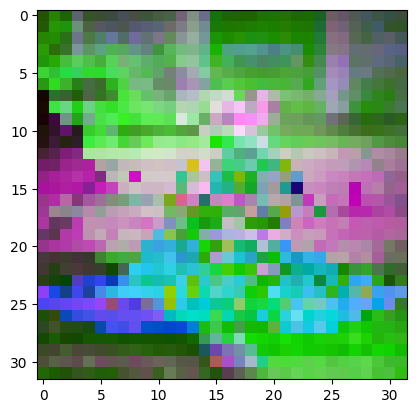

In [5]:
 
################################################################
file='pics/bridge.jpg'
img_color1 =cv2.imread(file,cv2.IMREAD_COLOR)
img_rgb1=cv2.cvtColor(img_color1,cv2.COLOR_BGR2RGB)
img_color1=cv2.resize(img_color1,(32,32))
img1_b,img1_r,img1_g=cv2.split(img_color1)#拆分不同通道子图像
################################################################
file='pics/girl.jpg'
img_color2 =cv2.imread(file,cv2.IMREAD_COLOR)
img_rgb2=cv2.cvtColor(img_color2,cv2.COLOR_BGR2RGB)
img_color2=cv2.resize(img_color2,(32,32))
img2_b,img2_r,img2_g=cv2.split(img_color2)#拆分不同通道子图像  
#######不同图片通道合并############################
img=cv2.merge([img2_b,img1_r,img2_g])
plt.imshow(img) 

# 背景知识 关于数据形状的再认识

总结之前深度学习知识，可以认为深度学习由以下几个知识模块构成：

1. 梯度下降
基于微积分知识，找到关于权参$W$的误差函数$L$的最小更新方向（梯度向量方向$\nabla w$）
2. 正向传播 forward
深度学习网络由多层构成，简单的可以分为全连接层，其实现了输入数据向量与该层权参内积，作为下一层激活层的输入，并通过激活函数计算得到激活值$A=Activate(X \dot W +B)$

最终到达损失函数层，通过损失函数，对比真值与预测值的差距loss，这一个过程称为正向传播

2. 反向传播与梯度下降 backward

正向传播后，得到$loss$。神经网络拟合的最终目标就是将$loss$降到最小，使得由权参、偏参所构成的深度网络函数$D$能够最好的拟合真实数据，并进行预测。



结合线性代数，numpy，张量知识，总结各种不同数据形状

基本概念
线性代数中，维度代表的是一个向量中特征值的多少，例如
[1,2,3,4,5]是一个向量，有5个特征值构成，维度为5。不管向量的维度多大，都表示的是空间（二维、三维、多维度）的一个点坐标，

以及从原点导该点的有方向，大小（norm模）的线段。而不是一个空间。
多个（维度一致）向量就可以组成一个矩阵，而矩阵实际上可以形成空间，
例如 [[2,1],[2,3]]就构成了一个2维空间，[[0,0,1],[1,0,0],[1,0,1]]构成了3维空间，但是构成空间的向量必须线性无关。

在数据分析中，多使用矩阵来表达一组数据量，矩阵中每一个构成的向量代表一个样本。矩阵的每一列代表一个属性。

阶，在深度学习张量概念中，也有维度，但此时维度指的是，

pytorch与tensorflow等深度学习框架中，使用的是tensor（张量）概念。

张量是一种数据结构，可以认为是一种高维数组。结合线性代数，所对照的张量

* 标量——0阶张量
* 向量——1阶张量
* 矩阵——2阶张量
* 多维向量组——多阶张量



1. 一元、多元函数对应的输入数据就是一个矩阵，而目标数据target是一个向量
2. 图片，不论是否彩色，都是3阶

[图解卷积神经网络（CNN）](https://zhuanlan.zhihu.com/p/117573015)

# CNN基本概念

之前基于全连接层处理图像时，由于全连接Linear层只能接受(batach,vector)类型的矩阵，使得图像作为一张2维矩阵，无法直接输入，只能先通过flatten（）摊平，而后载入即：

[hight,width] $\rightarrow flatten \rightarrow$ [vector]

而由于图像还要考虑3色彩通道问题，使得对应的张量实际是3阶张量，即[batch,channel,hight,width]形式，使得如果要直接载入线性层，还必须变换，例如
 ```python
 x=x.view(-1,hight*width)
```
 而这一过程势必将使得处理非常复杂。

 但最大的问题不在于此，回顾全连接层，

 假设有个图片为$25 \times 25$
 解析度，如果将其flatten 那么对应向量的长度将为625,再考虑通道数目，得到向量$x$长1875，假设现在第一层网络神经元有1000个，
 
 那么$x$向量中每个数值都与第一层所有神经元进行加权（权参）连接，需要的权参有$1875 \times 1000$个，
 
 显然那么多的参数会带来模型复杂问题，但最主要的问题是会使得模型出现过拟合问题。

 <font color='red'>所以CNN的出现最大的目的之一就是减少权参，简化模型，减低过拟合</font>
 
 为了解决这些问题，引入CNN，实际其分为两层组成，卷积层(Convolution)，池化层(Pooling)。

 通过过滤器（核）对输入特征图（input feature map）的扫描，得到输出特征图（output feature map）

* 卷积层： 作用类似于全连接层，其也具有W滤波器（对应权参），b（偏参），但是不同的是，其输入去滤波器相乘是一个二维的过程。

* 池化层： 在卷积神经网络中，池化层是一种常用的操作层，它的作用是对输入的特征图进行下采样，从而减小特征图的空间大小，同时减少网络参数的数量，提高网络的计算速度。池化操作通常是在卷积层之后进行的，它可以有助于网络学习到平移不变性和缩放不变性，同时也可以降低特征图中的噪声和过拟合。

池化层通常有两种类型：最大池化和平均池化。最大池化操作是在输入的特征图上进行的，每个池化窗口内的最大值将被保留，而其他值将被忽略。平均池化操作是对输入的特征图上的每个池化窗口进行平均化操作，从而减少特征图的空间大小。

通过池化操作，可以将特征图的尺寸减小，这有助于减少模型的参数数量和计算量，从而加速模型的训练和推理过程。此外，池化层还可以减少过拟合的风险，提高模型的泛化能力。

## CNN 解释方法1-基于receptive field解释

> 名词界定： CNN中将卷积层输入输出的数据称为“特征图”(feature map)，其中卷积层的输入数据称为“输入特征图”(input feature map)，输出数据称为“输出特征图”(output feature map)。

receptive field即责任区域，基本原理就是一组神经元只负责一个特定的区域，这些区域可以overlap

CNN背后有几个基本的原理
1. 看图不需要看全部，要看重点

对比之前全连接层，实际上每一个神经元激活函数都代入了整个向量所有值



$$output_1=f_{activate}(w_{11} \times i_1 +w_{21} \times i_2...w_{n1} \times i_n)$$

这就相当于要一个人把一张图的每一个部分全部看完，才知道这个图是啥，但实际上辨别一个图只需要看其重点pattern（像素值大）的部分就可以了。

例如人看图片的时候，首先最关注的是脸轮廓，以及眼睛。

 <img src="figs\cnn1.jpg" height="50%" width="50%">

2. 基于point 1 的原理，可以让输入层后的**一个**神经元，只关注**一部分**图案——守备范围（pattern——receptive field），具体为在$m \times n$图片矩阵中只选取$l \times p$大小的图案（同时选取RGB三个图层），然后将其**faltten**化，再注入神经元激活函数处理。
 <img src="figs\cnn2.jpg" height="50%" width="50%">
 
在此有几个有趣的点,经典的读取pattern方式是一个$l \times l $方阵，并RGB层都同时穿透读取，但；
  * pattern的大小、形状可以设定
  * 可以只读取RGB层中一层
  * 不同神经元对应的pattern可以交叉，甚至完全重叠，从而增强对某pattern的识别（实际上训练中就是设定$n$个neuron扫描一个receptive field）
  > (典型的情况下RGB层都读取，pattern size 为正方形)
  
 <img src="figs\cnn2.jpg" height="50%" width="50%">

---

3. 由上可知通过卷积扫描过程，使得不同组的neurons，关注一个特定范围的子图（receptive field），这应该实现了对二维输入特征图的有效学习

但没有减低权参个数，反而会有所增加，但是由于这一组neurons都学习同一个field，其参数可能会有重复，总体应该还是会减少。
但更为直接减少权参的方法是引入共享参数。


#### 2. 共享权参

图片不同区域（receptive field）可能存在相同的pattern——例如不同的图中都出现了一样鸟嘴，只不过出现位置不同，那么

不同receptive fild对应neurous就可以共享参数。

 <img src="figs\cnn4.jpg" height="50%" width="50%">

如上图中，neor1，nero2 负责的receptive field不同，但是可能存在对应pattern相似情况，在此两个nero输入的input不同（各自receptive field矩阵flatten），但是可以使用同样的权参，当然激活函数得到结果也不同，以此减少了权参数目。

当扩展到之前设立的一组neurous处理一个receptive field时，策略如下：

 <img src="figs\cnn5.jpg" height="50%" width="50%">

 设每个field由64个neurons处理，第一组为$n_{g11},n_{g12}...g_{g1n}$第二组为$n_{g21},n_{g22}...g_{g2n}$

第一组中$n_{g11}$输入flatten后filed权参向量$filter_1=[w1,w2,...w64]$与第二组$n_{g21}$权参向量实现共享，以此类推


 <img src="figs\cnn7.jpg" height="50%" width="50%">

### 小结

 <img src="figs\cnn6.jpg" height="50%" width="50%">

1. cnn的目标应该包括两个方面：
   * 保持图像二维特征，使得激活层能够学习到二维矩阵上下左右的关系，而非如全连接层只能注入摊平的向量
   > 这一目标通过过滤器（核）进行实现。
   * 减少W权参，降低过拟合
   > 这一目标通过不同的recevptive field共享相同的权参实现。

2. 与Fully connected 对比
   全连接弹性强，但是对应权参数目也过大，导致过拟合现象。

   通过receptive field 使得网络中一组neurons只关注一个子图范围矩阵；再通过parameter sharing使得不同组neurons共享权参。

   以上步骤使得模型的注意力更强，或者说对应特定的数据识别率更好了（对猫，对狗）。

   总之，cnn model的bias比较大，特别适用于图像领域，但是对其他领域的使用必须小心。
   


## CNN 解释方法2——滤波器filter 解释
> 参考：深度学习入门，基于python的实现 

滤波器的解释与receptive field不同之处在于
1. receptive field 解释中，首先是确定$[n,n]$大小守备区域矩阵（子图），然后将该矩阵flatten变为$[1,n \times n]$行向量，再与对应W权参列向量$[n \times n,1]$点积，得到载入对应（一个）neurons的输入值$input=w_1 \times z_1 + ...w_n \times z_n$。
2. filter滤波器介绍中，首先表达上，$w1,w2,...w_{n,n}$ 权参已经排列在$[n,n]$大小过滤图$filter$上，$[n,n]$大小守备区域矩阵（子图）与$filter$相乘（inner product）后求和，找到敏感区域，并对应到新图位置中，实际上这个求得的值就是$input=w_1 \times z_1 + ...w_n \times z_n$。注意到在此时，整个图片都使用的同一个filter，实际实现了“2. 共享权参”

 <img src="figs\cnnnet.jpg" height="50%" width="50%">
 
---

滤波器解释下，可以将卷积分为以下几个步骤（深度学习入门，基于python的实现）

1. 图像$image$分通道（channel），载入图像$image_r,image_g,image_b$矩阵，每个分通道图像行列长宽为$H,W$
2. 对图像进行滤波处理，设滤波器矩阵的长宽为$FH,FW$,扫描图像方式为一行行扫描
   * 扫描默认是每次移动一个单位，称为步幅(stride)，但可调整为2个或更多单位，对应的，移动步伐越大，生成后得到滤波图像就越小。
     > 扫描pattern必须重叠(overlap)的原因是，如果不重叠，那么pattern之间的边缘可能就没有扫描到
     > 扫描注意列方向也有stride
   * 扫描过程中，为了保持原始图像大小，原始图像将会上下左右“扩充(padding)”，使得扫描最终图像会大于滤波矩阵，扩展的单位即一个数值单位，转换图像就是上下左右4个数值单位
     > padding 的设置原因包括

     >（1）如果不填充那么通过层层cnn，图像会愈来愈小，最后无法使用（变为像素1）；
     
     >（2）因为扫描具有步伐，可能照成边缘无法覆盖（无法整除），但是边缘图像也必须扫描，故此可以通过设置padding，将边缘包括

     > (3) padding 填充的值可以是null，但也可以是个数值（对应颜色深度），也可以是将边缘颜色深度直接填充
  



对比全连接层中权参矩阵$W$，与输入数据向量的$I$点积得到输出向量，然后输入激活层。Conv中**一个**滤波器就对应了线性中一个权参，但此处输入并不是一个向量，而是一个矩阵（例如图片），

滤波器与输入值之间运算也非点积，而是滤波器扫描后的元素对应乘。


设扫描中，填充为$P$(数值单位),步伐为$S$数值单位，得到最终输出的分通道图像大小$OH,OW$
   $$OH=\frac{(H+2P-FH)}{S} +1$$
   $$OW=\frac{(W+2P-FW)}{S}+1$$
> $OH,OW$计算可能不能整除，但pytorch，tensorflow等会自动四舍五入

---
使用滤波器的原因可以从图像的对照关系来理解
* filter中每个权参w可以对应一个像素点，那么filter就构成了一个pattern感知器
* inputer feature map中与filter 对应大小的区域与filter对比（元素对应乘法、加），那么和filter图模型相近的子图，得分就较高。
* backward 时权参w向loss函数最小方向梯度下降，此时filter构成的pattern就应该与input feature map某区域（或多个相似区域）的拟合度愈来愈高，换句话说模型拟合度上升。

 <img src="figs\cnn8.jpg" height="50%" width="50%">

例如上图滤波器filter1，就“发现了”input feature map中与其相似子图，体现在计算后，子图对应的z值大

3. 经过步骤2 后，3个通道的滤波后的图像矩阵分别为 $f(image_r),f(image_g),f(image_b)$三个形状相同$FH*FW$矩阵，通过将矩阵相加，得到卷积最终结果。

4. 如果同时有$FN$个滤波器，例如$f_1,f_2,f_3...f_n$同时对图像$image$进行运算，那么最终的结果形成了$FN$个滤波后的矩阵集合。

5. 步骤1如果载入的不是一张图片，而是一个批次batch图片，那么就实现了批次处理。

两种解释方法的对比

 <img src="figs\cnn12.jpg" height="50%" width="50%">

cnn无法实现放大缩小、旋转后的图片识别问题。

Numpy实现

 <img src="figs\cnn9.jpg" height="50%" width="50%">

1. 模拟图像
2. 同im2col将input feature map从4阶，转为矩阵
   * im2col-image to coumnl，在此im2col的作用是将input feature map 转换称为能够与随后的filter进行点积@的形状，行为将作用的filter的个数（M个）。
   * 同事M个filter

设每个滤波器形状为$filter[C,FH,FW]$共$FN$个$filter$
计算步骤如下：

  * step1: 

      将每一个$filter$ 变为向量,得到形状为$\vec{f}=[C \times FH \times FW]$
  * step2:

      $FN$个$filter$合并，得到矩阵$fs=[FN,C \times FH \times FW]$

  * step3:

      为方便计算，将$fs$装置，得到$fs.T \rightarrow fs^T=[C \times FH \times FW,FN]$

  * step4: 
      
      根据step3，input feature map就转换为与$fs^T$整个矩阵点积问题，
      
      那么就也需要将input feature map 转为列为 map2=$[x,C \times FH \times FW]$ 大小的矩阵

      最终得到计算结果：

      $[x,C \times FH \times FW] \cdot [C \times FH \times FW,FN]$ 


如图所示，设filter 有FN个，为了计算，将每一个滤波器首先变为列向量，然后合并，得到一个[]

```python
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """

    Parameters
    ----------
    input_data : 由(数据量, 通道, 高, 长)的4维数组构成的输入数据
    filter_h : 滤波器的高
    filter_w : 滤波器的长
    stride : 步幅
    pad : 填充

    Returns
    -------
    col : 2维数组
    """
    ###输入input feature map ###
    #N :batch size ;C:channel ;H:height;W:width
    N, C, H, W = input_data.shape
    ### filter 后输出out feature map大小###
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    ##np.pad 实现边缘填充##
    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')

    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

```

im2col 就是将input feature map，filter都转换为二维矩阵，而后进行运算



基于im2col函数实现池化层

In [2]:
import numpy as np
from common.util import * 
class Convolution:
    def __init__(self,W,b,stribe=1,pad=1):
        """numpy 实现卷积网络

        Args:
            W (_type_): 权参，在此构成了FN个filter中相应位置值
            b (_type_): 偏参
            stribe (int, optional): 扫描步长.
            pad (int, optional): 填充值. Defaults to 1.
        """
        
        self.W=W
        self.b=b
        self.stribe=stribe
        self.pad=pad
    def forward(self,x):
        """向前传播
        Args:
            x (_type_): 输入input featture map
        """
        FN,C,FH,FW=self.W.shape
        N,C,H,W=self.x.shape
        out_H=int((H+2*self.pad-FH)/self.striber+1)
        out_W=int((W+2*self.pad-FW)/self.striber+1)
        img_col=im2col(x,FH,FW,self.striber,self.pad)
        W_col= self.W.reshape(C*FH*FW,-1)
        out=img_col@W_col+self.b
        ###实现将得到的结果矩阵转换为[N,C,out_H,out_W]形式###
        out=out.reshape(N,out_H,out_W,-1).traspose(0,3,1,2)
        #transpose起到张量阶位置改变作用#
        return out 
     # 从原理上，CNN的反向传播函数实际与Affine一样   
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


### Pooling （subsampling）
比较Convolution Layer Pooling 更像是激活函数层而非Convolutional或全连接层，因为其没有权参、偏参，而是直接在区域子图中找到最大（像素最深）值，而后输出组成新图，比较类似$max()$类型激活函数。当然也可以用其他的函数，例如$min()$找到最浅像素代表。

最终结果pooling就会把图变小，留下关键点（例如像素深的点）

一般是先Convolution 然后pooling，即构建一组filter权参输入子图，再将这些子图进行缩小。

但是这种方法也可能带来丧失图像细微细节问题，故也可以不要pooling，全部convolution，即full convolution（算力强硬算）。

### CNN网络结构的搭建

CNN可以多个层叠，即一个Convolutional 层后再跟一个 Convolutional层。比较有趣的是，

开始的时候filter中对应参数W偏参，组成图像时随机的，但随着多次学习后，CNN的各个filter“学到”了训练图像的特征，或者说构成filter的偏参组成了对图像敏感的参数。

 <img src="figs\cnn10.jpg" height="50%" width="50%">

随着层次加深，提取的信息（正确地讲，是反映强烈的神经元）也越来越抽象。也就是说，随着层次加深，神经元从简单的形状向“高级”信息
变化。换句话说，就像我们理解东西的“含义”一样，响应的对象在逐渐变化

一般结构而言，CNN最后会跟随一个全连接层，这也意味这，在注入全连接层之前CNN的out feature map会进行flatten，形成向量。


 <img src="figs\cnn13.jpg" height="50%" width="50%">

Torch 中CNN设置

* [参考](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
* [toronto university Convolutional Neural Networks](https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w03/convnet.html)
---
参数：

in_channels (int) – Number of channels in the input image，输入特征图像的chanels例如RGB 3个channel

out_channels (int) – Number of channels produced by the convolution实际就是filter的个数，因为输入的channle在cnn中加总合并了。

kernel_size (int or tuple) – Size of the convolving kernel filter图像的分辨率

stride (int or tuple, optional) – Stride of the convolution. Default: 1

padding (int, tuple or str, optional) – Padding added to all four sides of the input. Default: 0

padding_mode (str, optional) – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'

dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1

groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1

bias (bool, optional) – If True, adds a learnable bias to the output. Default: True

cv2读取照片得到的数组形状： (1050, 700, 3)
首先增加batch_size阶，并同transpose将阶顺序改变，将channel阶提升到第二个阶, (1, 3, 1050, 700)


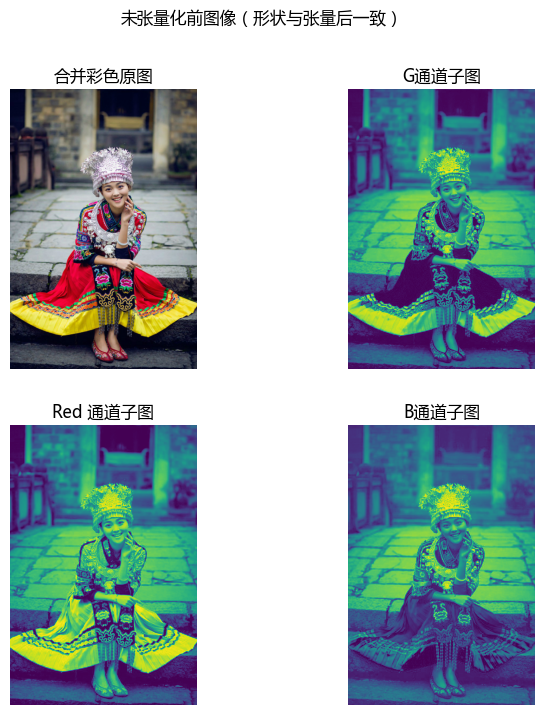

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


结果卷积后的张量形状，注意其out_chanels:torch.Size([1, 20, 1040, 690])，代表的是conv中的filter个数


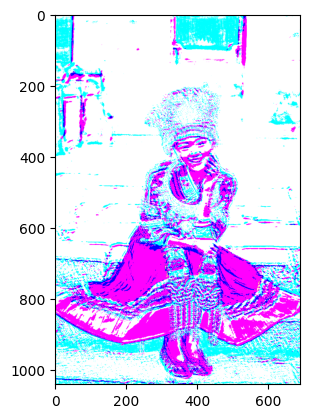

(1040, 690, 4)
池化后，out feature map 形状，图像大小直接缩小1/2 torch.Size([1, 20, 520, 345])


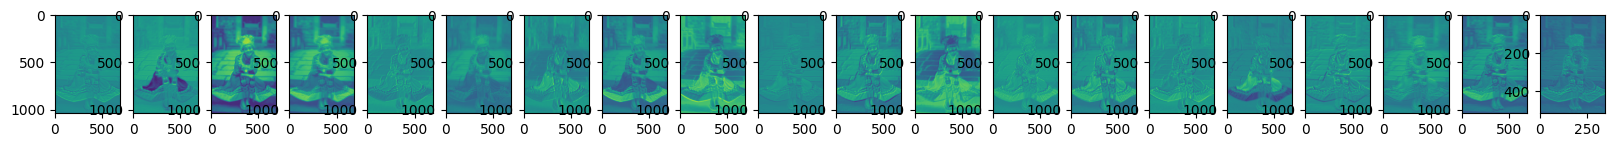

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
 
import torch 
import torch.nn as nn
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os
 
if __name__ == '__main__':
    ########################读入本地图片，为了能够让pytroch的CNN处理，对其形状进行改变########################################
    file='pics/girl.jpg'
    img_c=cv2.imread(file,cv2.IMREAD_COLOR)
    img_rgb=cv2.cvtColor(img_c,cv2.COLOR_BGR2RGB)#注意opencv读取3通道彩色图像是BGR，必须经过转换才能显示
    print("cv2读取照片得到的数组形状：",img_rgb.shape)
    
    ##之前img_rgb是一个3阶[H,W,Channels]3阶，但cnn中接受格式是[batch_size, channels,H,W]
    #np.newaxis赋予原数组新位置新阶
    #transpose将阶顺序改变，将channel阶提升到第二个阶
    images=img_rgb[np.newaxis,:].transpose(0,3,1,2) 
    print("首先增加batch_size阶，并同transpose将阶顺序改变，将channel阶提升到第二个阶,",images.shape)

    ################################展现inpu feature map################################
    #images=np.random.rand(10,1,25,25)
    # 分通道展现图片
    imageR=images[0,0,:]
    imageG=images[0,1,:]
    imageB=images[0,2,:]

    imgMerge=cv2.merge([imageR, imageG, imageB])#合并三个通道图像，并输出
    
    myfont=FontProperties(fname=r"pics/微软雅黑.ttf",size=12)
    #创建figure对象以及对象包含的多个子图
    fig2,axes2=plt.subplots(2,2)
    fig2.set_size_inches(8,8)
    fig2.suptitle("未张量化前图像（形状与张量后一致）",fontproperties=myfont)

    ax1=axes2[0,0]
    ax1.axis("off")
    ax1.set_title("合并彩色原图",fontproperties=myfont)# 给第一个图副值titile
    ax1.imshow(imgMerge)

    ax2=axes2[1,0]
    ax2.axis("off")
    ax2.set_title("Red 通道子图",fontproperties=myfont)
    ax2.imshow(imageR)
    
    ax3=axes2[0,1]
    ax3.axis("off")
    ax3.set_title("G通道子图",fontproperties=myfont)
    ax3.imshow(imageG)

    ax4=axes2[1,1]
    ax4.axis("off")
    ax4.set_title("B通道子图",fontproperties=myfont)
    ax4.imshow(imageB)
    
    plt.show()
  
    ################################构建torch中cnn层，并对图片进行卷积################################
    image_t=torch.from_numpy(images).float()#注意来源于numpy的tensor的数据类型转换
    
    conv_layer=nn.Conv2d(in_channels=3,# number of channels in the input (lower layer)
                         out_channels=20, # size of the kernel or receiptive field
                         kernel_size=15, # number of channels in the output (next layer)
                         stride=1,padding=2)
    conv_image=conv_layer(image_t)
    print("结果卷积后的张量形状，注意其out_chanels:{}，代表的是conv中的filter个数".format(conv_image.shape))
    ############################分通道得到卷积后图像，然后合并输出############################################
    #但注意，最多4个filter的子图可以合并，因为图像的channle不能超过4个
    x=[]
    
    image_t2nR=conv_image[0,0,:].detach().numpy()
    x.append(image_t2nR)
    image_t2nG=conv_image[0,1,:].detach().numpy()
    x.append(image_t2nG)
    image_t2nB=conv_image[0,2,:].detach().numpy()
    x.append(image_t2nB)
    image_t2nC=conv_image[0,2,:].detach().numpy()
    x.append(image_t2nC)
    x_merge=cv2.merge(x)
    plt.imshow(x_merge)
    plt.show()
    print(x_merge.shape)
    filter_imgs=[]
    plt.figure(figsize=(20,20))
    for i in range(conv_image.shape[1]):
        filter_img=conv_image[0,i,:].detach().numpy()
       
        filter_imgs.append(filter_img)
        plt.subplot(1,conv_image.shape[1], i+1)
        plt.imshow(conv_image[0,i,:].detach().numpy())
    filter_merge=cv2.merge(filter_imgs)# 最终将各个通道的子图层叠，但当filter超过4个，对应的图像最多4个channels
    #plt.imshow(filter_merge)
    ##################池化层#####################
    pool=nn.MaxPool2d(kernel_size=(2,2))
    pool_image=pool(conv_image)
    print("池化后，out feature map 形状，图像大小直接缩小1/2",pool_image.shape)
    pool_image_n=pool_image.detach().numpy()
    plt.imshow(pool_image_n[0,0,:])
    plt.show()
    
    

创建nn类，实现cnn

In [37]:
def out_h_w(x,p,f,s):
    return ((x+2*p-f)/s)+1
if __name__ =="__main__":
     c1=out_h_w(x=32,p=0,f=3,s=1)
     print(c1)
     #p1=c1/2
     #print(p1)
     c2=out_h_w(x=c1,p=0,f=3,s=1)
     print(c2)
     #p2=c2/2
     #print(p2)
     

24.0
22.0


lab 2.1

1. lab goal:

 * build the CNN model and train it using mninst data;
 * visualize the cnn graph in every epoch;
 * record the shape of data in the model;

2. results:
  the cnn model (using in the graph classification) is much better than linearn model, the accuracy loss:
   The final train loss：0.0008734139846637845
   The final train  loss为：0.16739268600940704
   The final train accuracy：100.2004008016032%
    The final test accuracy：90.7815631278557%

    here we don't use dropout so the overfiting is a litter high ,but the accuracy is 90%(in test data) compare to 84 using linear model 
3. critial points:
   the shape of tensor in Conv2d layer is [batch size,channel size,height, width], but the linear only accept [batch size,input features] which is  2 dimensions, so it must reshape(view) the shape into [baitch size,channel size * width]

current device: cpu
一个train epoch中数据长度 500
一个test epoch中数据长度 500
##############第0次epoch#################
train loss为：2.09006929397583
test loss为：1.9316717386245728
train accuracy为：35.6%
test accuracy为：59.599999999999994%
##############第10次epoch#################
train loss为：0.09528537094593048
test loss为：0.22173427045345306
train accuracy为：97.191977551891%
test accuracy为：88.57714309736586%
##############第20次epoch#################
train loss为：0.00879062619060278
test loss为：0.16980881989002228
train accuracy为：100.2004008015968%
test accuracy为：89.77955592623316%
##############第30次epoch#################
train loss为：0.002507730619981885
test loss为：0.1696745902299881
train accuracy为：100.2004008016032%
test accuracy为：89.98156151665249%
##############第40次epoch#################
train loss为：0.001155767240561545
test loss为：0.1739015132188797
train accuracy为：100.2004008016032%
test accuracy为：90.78156392785573%
***********************fin! good luck!*******************************
The final train los

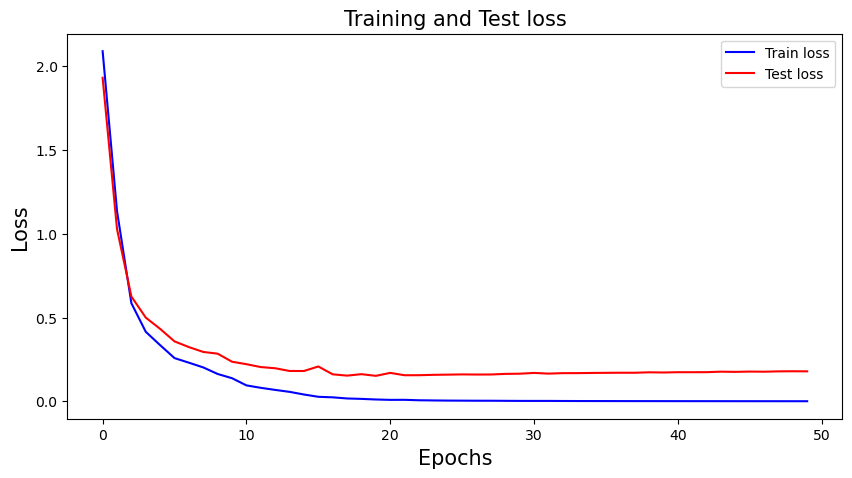

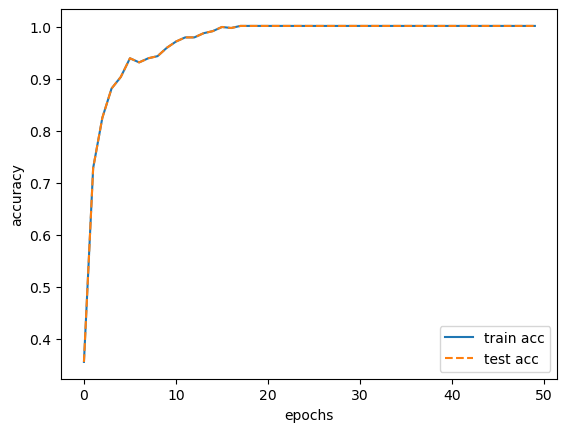

In [3]:
import torch 
import torch.nn as nn 
from torch import optim
 
 
import myfucntion.Function as f
from importlib import reload
from sklearn.preprocessing import StandardScaler
#import load_data as l
from matplotlib import pyplot as plt
import numpy as np 
from torchsummary import summary
import torch.nn.functional as F
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data import Subset
import matplotlib.pyplot as plt

reload(f)

def out_h_w(x,p,f,s):
    return (x+2*p-f)/s
 
class myCnn1(nn.Module):
    def __init__(self) -> None:
        super(myCnn1,self).__init__()
        
        self.cov1=nn.Conv2d(in_channels=1,out_channels=5,kernel_size=3)
        self.r1=nn.ReLU()
        self.p1=nn.MaxPool2d(kernel_size=(2,2))
        self.cov2=nn.Conv2d(in_channels=5,out_channels=12,kernel_size=3)
        self.r2=nn.ReLU()
        self.p2=nn.MaxPool2d(kernel_size=(2,2))
        self.l1=nn.Linear(in_features=12*5*5,out_features=256)
        self.l2=nn.Linear(in_features=256,out_features=10)
    def forward(self,x):
        x=self.cov1(x)
 
        ##输出batch中经过卷积处理后的第一张图，通道为1的图像
        conv_image1=x[0,0,:].detach().numpy()
        #plt.imshow(conv_image1)
        #plt.show()
        x=self.r1(x)
        #print(x.shape)
        x=self.p1(x)
      
        x=self.cov2(x)
   
        x=self.r2(x)
        #print(x.shape)
        x=self.p2(x)
        #print(x.shape)
        x=x.view(-1,12*5*5)
        #print(x.shape)
        x=self.l1(x)
        x=self.l2(x)
        return x 
if __name__ == "__main__":
################################获取数据##########################################################
    ################################数据载入、数据预处理################################
   train_ds=torchvision.datasets.MNIST('data/',train=True,transform=ToTensor(),download=False)
   test_ds=torchvision.datasets.MNIST('data/',train=False,transform=ToTensor(),download=False)
    # 缩减数据量
   num_train_examples = 500
   num_test_examples  = 300
   train_ds = Subset(train_ds, np.arange(num_train_examples))
   test_ds = Subset(test_ds, np.arange(num_train_examples))
    # 通过dataloader进行处理
   train_data=torch.utils.data.DataLoader(train_ds,batch_size=20,shuffle=True)
   test_data=torch.utils.data.DataLoader(test_ds,batch_size=20,shuffle=False)
   

   train_loss_list=[]
   test_loss_list=[]
   train_correct_list=[]
   test_correct_list=[]
    ################################numpy数据张量化，并载入本机gpu或cpu################################`
   device="cuda" if torch.cuda.is_available() else "cpu"
   print("current device: " + device)

################################define the super parameters######################################   
   learning_rate=0.001#学习率
   batch_size=20# 每批次随机选取100张图像
   epochs=50#循环epoch次数

################################网络模型实例、loss、optimal函数设立################################
   cnn=myCnn1()
   cnn.to(device)
   loss_fn=nn.CrossEntropyLoss()
   opt=optim.Adam(params=cnn.parameters(),lr=learning_rate)
    ################################网络实例训练################################
   train_len=len(train_data.dataset)
   print("一个train epoch中数据长度",train_len)
   test_len=len(test_data.dataset)
   print("一个test epoch中数据长度",test_len)
   train_correct=0
   test_correct=0
   for epoch in range(epochs):
        #print("第{}次epoch".format(epoch))
        step_loss=[]
        step_correct=[]
        for x,y in train_data:
            x,y=x.to(device),y.to(device)
            pred=cnn(x)
            loss=loss_fn(pred,y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            #将每一batch中loss加入loss list中#
            step_loss.append(loss.cpu().detach().numpy())
            # 通过比对概率最大的输出是否为target，正确则正确率加1
            train_correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
 
        train_loss=np.mean(step_loss)#计算一个epoch的平均loss
        train_loss_list.append( train_loss)#将该epoch的平均loss加入train loss list作为绘图数据
 
        train_correct/=train_len#计算该epoch的正确率
        train_correct_list.append( train_correct)#将该epoch的正确率加入train correct list作为绘图数据
        
        
        with torch.no_grad():# since we're not training, we don't need to calculate the gradients for our outputs
            for x,y in test_data:
                x,y=x.to(device),y.to(device)
                pred=cnn(x)
                loss=loss_fn(pred,y)
                step_loss.append(loss.cpu().detach().numpy())
                test_correct+=(pred.argmax(dim=1)==y).type(torch.float).sum().item()
                
        test_loss=np.mean(step_loss)
        test_loss_list.append(test_loss)
      
        test_correct/=test_len
        test_correct_list.append( train_correct)
        
        
        
        if epoch%10==0 :
            print("##############第{}次epoch#################".format(epoch))
            print("train loss为：{}".format(train_loss))
            print("test loss为：{}".format( test_loss))
            print("train accuracy为：{}%".format(train_correct*100))
            print("test accuracy为：{}%".format( test_correct*100))
        if epoch==epochs-1:
            print("***********************fin! good luck!*******************************")
            print("The final train loss：{}".format(train_loss))
            print("The final train  loss为：{}".format( test_loss))
            print("The final train accuracy：{}%".format( train_correct*100))
            print("The final test accuracy：{}%".format( test_correct*100))
   f.loss_fig(train_loss_list,test_loss_list)
   f.accuracy_fig(train_correct_list,test_correct_list)
   

## 　AlexNet
AlexNet is the typciall deep CNN network, from it we can learn the strucutre of cnn.

1. alexnet is inculded in pytorch and is a pre-trained network, which means researchers often release both the architecture and the weights of the networks they train.
2. alexnet compsed two parts: (1) features;(2)classifier 

---

AlexNnet是Cnn经典模型，并已经保存在torchvision.models模型中，属于预训练模型，并可以通过调用查看相关模型参数


In [3]:
import torchvision.models# 包含了pytorch 中视觉相关预训练模型
alexNet = torchvision.models.alexnet(pretrained=True)
alexNet

c:\Users\tom\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tom\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

the module is composed by two parts: fatures,which inclused 5 CNN layers and relu,maxpools, and the pattern in

Conn->Relu->maxpool

---
Notice that the AlexNet model is split into two parts. There is a component that computes "features" using convolutions.

---
 
in Maxpool there are two parameters:
当ceil_mode = true时，将保存不足为kernel_size大小的数据保存，自动补足NAN至kernel_size大小；
当ceil_mode = False时，剩余数据不足kernel_size大小时，直接舍弃。

In [3]:
print("CNN,Relu,pooling layers：")
alexNet.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [4]:
alexNet.classifier

Sequential(
  (0): Dropout(p=0.5, inplace=False)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace=True)
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace=True)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

### AlexNet Features
The first network can be used independently of the second. Specifically, it can be used to compute a set of features that can be used later on. This idea of using neural network activation features to represent images is an extremely important one, so it is important to understand the idea now.

---

观察cnn模型，其可以分为，feature部分和classification部分（classfication 部分也可以换位其他例如二分类模型）

那么feature部分也可以用于其他图片，只需要重新训练即可，

注意此处cnn模型重要的是in channel,out channel，在输入参数中对图片格式并没有显式要求，

而是在linear层中，必须在input feature中，指定经过层层cnn和pooling 后的一个输入数据的形状


If we take our image x from earlier and apply it to the alexNet.features network, we get some numbers like this:

cv2读取照片得到的数组形状： (1050, 700, 3)
增加1个阶数： torch.Size([1, 1050, 700, 3])
交换阶后的张量形状： torch.Size([1, 3, 1050, 700])
返回第一层cnn模型： Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
经过alexNet的第一层cnn后，得到数据形状： torch.Size([1, 64, 261, 174])
为了更好地显示图片，对h，w进行归一化，得到图像shape: (1, 64, 261, 174)


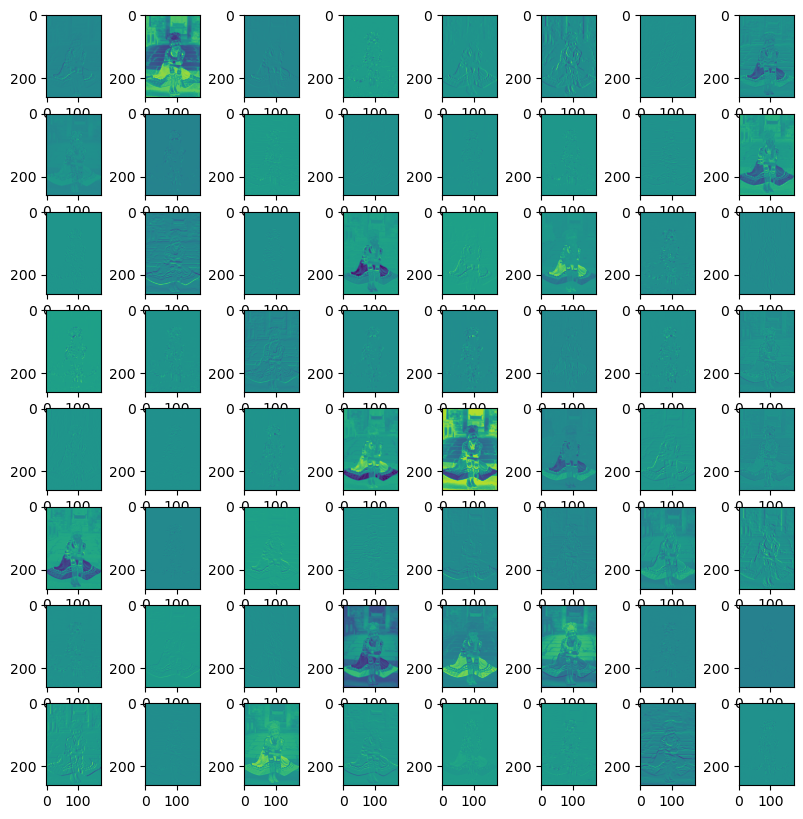

In [19]:
import numpy as np 
import matplotlib.pyplot as plt 
 
import torch 
import torch.nn as nn
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os
 
if __name__ == '__main__':
    ########################读入本地图片，为了能够让pytroch的CNN处理，对其形状进行改变########################################
    file='pics/girl.jpg'
    img_c=cv2.imread(file,cv2.IMREAD_COLOR)
    img_rgb=cv2.cvtColor(img_c,cv2.COLOR_BGR2RGB)#注意opencv读取3通道彩色图像是BGR，必须经过转换才能显示
    print("cv2读取照片得到的数组形状：",img_rgb.shape)
    

    ################################构建torch中cnn层，并对图片进行卷积################################
    image_t=torch.from_numpy(img_rgb).float()#注意来源于numpy的tensor的数据类型转换
    
    ################################使用alexnet的feature部分对图像进行处理，得到feature####################
    ## 由于conv接受的图片张量格式为 [batchsize,channel,h,w]故需要对数据shape进行转换包括
    #1. 增加一个阶数，原阶数为3
    image_t=image_t[np.newaxis,:]
    print("增加1个阶数：",image_t.shape)
    #2.调整各阶的顺序,注意，torch中与numpy.transpose()函数相对应的函数为permute
    image_t=image_t.permute(0 ,3 ,1 ,2 )
    print("交换阶后的张量形状：",image_t.shape)
    #3.载入模型 注意可以通过选择得到第一个cnn层
    alexNetConv = alexNet.features[0]
    print("返回第一层cnn模型：",alexNetConv)
    image_t_cnn=alexNetConv(image_t)
    print("经过alexNet的第一层cnn后，得到数据形状：",image_t_cnn.shape)
    y=image_t_cnn.detach().numpy()
    y = (y - y.min()) / (y.max() - y.min())
    print("为了更好地显示图片，对h，w进行归一化，得到图像shape:",y.shape)
    plt.figure(figsize=(10,10))
    for i in range(64):
        plt.subplot(8, 8, i+1)
        plt.imshow(y[0, i])

## 实验1 基于CNN的猫狗照片分类

知识点：

* 如果是二分类，可以使用sigmod函数作为最后的分类函数，而不用softmax，但对应的损失函数需要使用Binary Cross Entropy (nn.BCELoss())
对应的计算正确率方法也需要改变
```python

```
[参考](https://medium.com/analytics-vidhya/pytorch-for-deep-learning-binary-classification-logistic-regression-382abd97fb43)

* pytorch中transforms.Compose()方法允许将一系列的预处理方法放到列表中，起到pipeline的作用，同时该方法一般包装到Dataset类中，作为输入参数。
``` python
DataSet(x,y,transform=None)
```
* python 本地文件读取
pytorch 中可以有imagefold直接读取图像数据载入，但为了熟悉Dataset，初始不采用该方法

* Dataloader实例包装读入后的Dataset后，得到的dataloader是一个张量形如[batch size,:]

* train与test的划分可以在数据为numpy或DataFrame时候通过sklearn.model_selection 进行划分。
当已经经过Dataset包装后，可以

* model.train()和model.eval()

train()

启用 BatchNormalization 和 Dropout

eval()

不启用 BatchNormalization 和 Dropout，保证BN和dropout不发生变化，pytorch框架会自动把BN和Dropout固定住，不会取平均，而是用训练好的值，不然的话，一旦test的batch_size过小，很容易就会被BN层影响结果。
 
### 实验目的
1. 实现复杂的cnn网络包括：
   * 多个cnn，maxpooling 层的叠加，构成 feature squential
   * 不同cnn中channel的倍数递增
   * 构建classfication squential，实现droptout
2. 实现pytroch 标准化 Dataset Dataloader 数据管理流程，从而实现数据标准化处理
3. 扩展模型验证方法

### 实验步骤
1. 构建Dataset，Dataloader读取猫狗数据

In [ ]:
# python 文件目录操作复习
import glob
import os 
import cv2
path='data/catdog/'
files=glob.glob(os.path.join(path,"*/*.jpg"))
 
print("the total no of images ",len(files))
print(os.path.join(path,"train/"))
#os.listdir 列出目录下所有文件名称，包括后缀名
#print(os.listdir(os.path.join(path,"train/")))
images=os.listdir(os.path.join(path,"train/"))
label=images[0].split(".")[0]
print(label)
file=os.path.join("data/catdog/train/",images[0])
print(os.path.join("data/catdog/train/",images[0]))
img_c=cv2.imread(file,cv2.IMREAD_COLOR)
img_rgb=cv2.cvtColor(img_c,cv2.COLOR_BGR2RGB)#注意opencv读取3通道彩色图像是BGR，必须经过转换才能显示
print(img_c.shape)

1
(159, 217, 3)


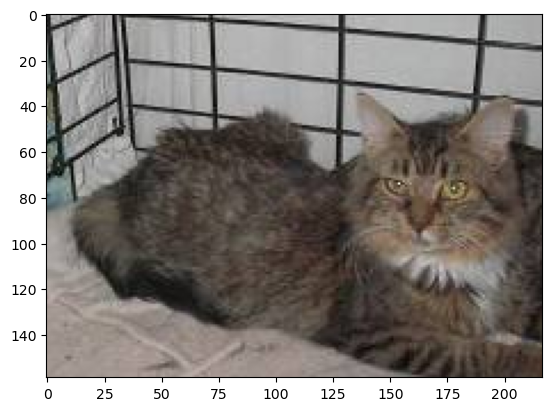

1
(3, 50, 50)
每一个批次train的batch size torch.Size([30, 3, 50, 50])
每一个批次label的batch size torch.Size([30])
每一个批次对应数据类型是4阶张量 <class 'torch.Tensor'>


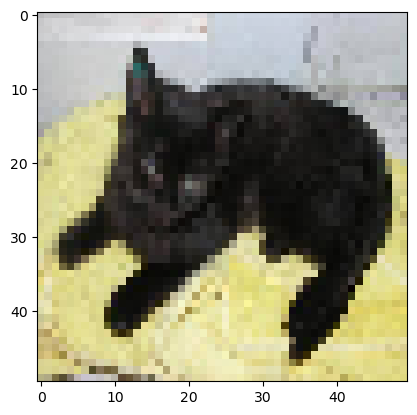

tensor(1)
25000
训练集大小： 20000 。测试集大小: 5000
数据集中数据: 4222
0


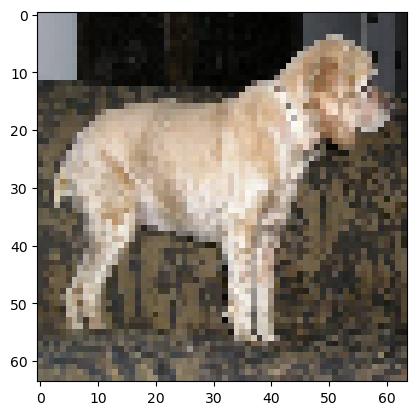

(3, 64, 64)
1
(3, 64, 64)


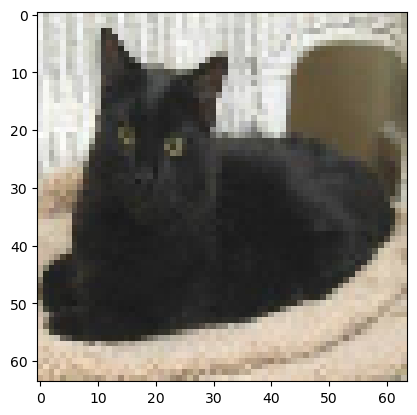

In [2]:
#步骤1数据准备
#获取猫狗数据
# 创建Dog、Cat Datase类
from torch.utils.data import random_split
import torch 
import cv2
import os 
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms 

class DCDataSet(Dataset):
    def __init__(self, imagePath,transform=None) -> None:
        """init方法中实现
        1.trian，test图片数据转换为张量tensor
        2.统一图片的分辨率

        Args:
            test (_type_): _训练数据_
            train (_type_): _测试数据_
        """
       
 
        self.imagePath=imagePath
        self.transform=transform
        self.images=os.listdir(self.imagePath)# listdir返回一个列表，包含目录下所有文件的文件名
        
        super().__init__()
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        
        label=self.images[index].split('.')[0]
        file=os.path.join(self.imagePath,self.images[index])
        if label=='cat':
            target=1
        else:
            target=0
        img_c=cv2.imread(file,cv2.IMREAD_COLOR)
        img_rgb=cv2.cvtColor(img_c,cv2.COLOR_BGR2RGB)#注意opencv读取3通道彩色图像是BGR，必须经过转换才能显示
        if self.transform is not None:
            img_rgb=self.transform(img_rgb)
        return img_rgb,target

if __name__ == "__main__":
    # 没有经过tensor的图片，读取，通过DataSet中getitem方法实现对数据的循环读取。
    train_path='data/catdog/train/'
    trainDataset=DCDataSet(train_path)
    img,t=trainDataset[3222]
    print(t)
    plt.imshow(img)
    print(img.shape)
    plt.show()
    # 创建transform实例，此时通过transfrom实现对图片数据的1. 张量化，图片shape统一化，归一化等。
    transform=transforms.Compose([transforms.ToTensor(), transforms.Resize((50,50))])
    trainDataset_t=DCDataSet(train_path,transform=transform)
    img2,t2=trainDataset_t[3222]
    print(t2)
    im2=img2.numpy()
    #注意通过transform实例张量化后，对应shape变为(channel,H,W)需要变为plt可以识别的(H,W,channel)格式
    plt.imshow(im2.transpose(1,2,0) )
    print(im2.shape)
    train_dataloader=DataLoader(trainDataset_t,batch_size=30,shuffle=True)
    train_feature,label=next(iter(train_dataloader))
    print("每一个批次train的batch size",train_feature.size())
    print("每一个批次label的batch size",label.size())
    print("每一个批次对应数据类型是4阶张量",type(train_feature))
    ########################读取一个batch size 中的图片以及label
    
    img3=train_feature[0,:]
    img3=img3.numpy()
    plt.imshow(img3.transpose(1,2,0))
    plt.show()
    
    label3=label[0]
    print(label3)
    ################################
    
    
    train_path='data/catdog/train/'
    transform=transforms.Compose([transforms.ToTensor(), transforms.Resize((64,64))])
    trainDataset=DCDataSet(train_path,transform)
    print(len(trainDataset))
    train_len=int(len(trainDataset)*0.8)
    test_len=int(len(trainDataset)-len(trainDataset)*0.8)
    print("训练集大小：",train_len,"。测试集大小:",test_len)
    ################################是否支持cuda################################

    ################################Data set 测试集训练集划分
    ##If we want to fixed the split result, we can write the following code in the head of program:
    torch.manual_seed(0)#实现随机划分可重复
    train_set, test_set = random_split(trainDataset, [train_len, test_len])
    #训练集中抽取数据进行查看
    index1=4222
    img,t=train_set[index1]
    print("数据集中数据:",index1)
    print(t)
    img=img.numpy()
    #注意通过transform实例张量化后，对应shape变为(channel,H,W)需要变为plt可以识别的(H,W,channel)格式
    plt.imshow(img.transpose(1,2,0) )
    plt.show()
    print(img.shape)
    img2,t2=test_set[222]
    print(t2)
    img2=img2.numpy()
    #注意通过transform实例张量化后，对应shape变为(channel,H,W)需要变为plt可以识别的(H,W,channel)格式
    plt.imshow(img2.transpose(1,2,0) )
    print(img2.shape)
    plt.show()

In [10]:
def out_h_w(x,padding,kernel_size,stride):
    return ((x+2*padding-kernel_size)/stride)+1
def pooling(x,kernel_size):
    return  x/kernel_size
if __name__ =="__main__":
     c1=out_h_w(x=64,padding=0,kernel_size=5,stride=1)
     print("经过第一层卷积后的图片分辨率：",c1)
     p1=pooling(c1,kernel_size=2)
     print("经过第一层pooling后的图片分辨率:",p1)
     c2=out_h_w(x=p1,padding=0,kernel_size=5,stride=1)
     print("经过第二层卷积后的图片分辨率：",c2)
     p2=pooling(c2,kernel_size=2)
     print("经过第二层pooling后的图片分辨率:",p2)
     c3=out_h_w(x=p2,padding=0,kernel_size=5,stride=1)
     print("经过第3层卷积后的图片分辨率：",c3)
    

经过第一层卷积后的图片分辨率： 60.0
经过第一层pooling后的图片分辨率: 30.0
经过第二层卷积后的图片分辨率： 26.0
经过第二层pooling后的图片分辨率: 13.0
经过第3层卷积后的图片分辨率： 9.0


In [3]:
from sklearn.model_selection import train_test_split as split
from torch.utils.data import random_split
import torch.nn 
import torch 
import torch.nn as nn 
import numpy as np
from torch import optim
from torch.utils.data import Subset
import myfucntion.Function as f
#############################Dataset定义###################################
class DCDataSet(Dataset):
    def __init__(self, imagePath,transform=None) -> None:
        """init方法中实现
        1.trian，test图片数据转换为张量tensor
        2.统一图片的分辨率

        Args:
            test (_type_): _训练数据_
            train (_type_): _测试数据_
        """
       
 
        self.imagePath=imagePath
        self.transform=transform
        self.images=os.listdir(self.imagePath)# listdir返回一个列表，包含目录下所有文件的文件名
        
        super().__init__()
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        
        label=self.images[index].split('.')[0]
        file=os.path.join(self.imagePath,self.images[index])
        if label=='cat':
            target=1
        else:
            target=0
        img_c=cv2.imread(file,cv2.IMREAD_COLOR)
        img_rgb=cv2.cvtColor(img_c,cv2.COLOR_BGR2RGB)#注意opencv读取3通道彩色图像是BGR，必须经过转换才能显示
        if self.transform is not None:
            img_rgb=self.transform(img_rgb)
        return img_rgb,target
##############################CNN模型定义################################
# 首先定义简单的两层conn
class MyCnn1(nn.Module):
    def __init__(self) -> None:
        super(MyCnn1,self).__init__()
        self.conv1=nn.Conv2d(in_channels=3,out_channels=5,kernel_size=5)
        self.r1=nn.ReLU()
        self.p1=nn.MaxPool2d(kernel_size=(2,2))
        self.conv2=nn.Conv2d(in_channels=5,out_channels=20,kernel_size=5)
        self.r2=nn.ReLU()
        self.p2=nn.MaxPool2d(kernel_size=(2,2))
        self.conv3=nn.Conv2d(in_channels=20,out_channels=40,kernel_size=5)
        self.r3=nn.ReLU()
        self.l1=nn.Linear(in_features=40*9*9,out_features=256)
        self.l2=nn.Linear(in_features=256,out_features=1)
        self.s1=nn.Sigmoid()
    
    def forward(self,x):
        
        x=self.conv1(x)
        x=self.r1(x)
        x=self.p1(x)
        x=self.conv2(x)
        x=self.r2(x)
        x=self.p2(x)
        x=self.conv3(x)
        x=self.r3(x)
        print(x.shape)
        x=x.view(-1,40*9*9)
        x=self.l1(x)
        x=self.l2(x)
        x=self.s1(x)
        return x 
    




if __name__ =="__main__":
        train_path='data/catdog/train/'
        transform=transforms.Compose([transforms.ToTensor(), transforms.Resize((64,64))])
        trainDataset=DCDataSet(train_path,transform)
        print(len(trainDataset))
        train_len=int(len(trainDataset)*0.8)
        test_len=int(len(trainDataset)-len(trainDataset)*0.8)
        print("训练集大小：",train_len,"。测试集大小:",test_len)
        ################################是否支持cuda################################
        device="cuda" if torch.cuda.is_available() else "cpu"
        print("current device: " + device)
        ################################Data set 测试集训练集划分
        ##If we want to fixed the split result, we can write the following code in the head of program:
        torch.manual_seed(0)#实现随机划分可重复
        train_set, test_set = random_split(trainDataset, [train_len, test_len])
        # 缩减数据量
        num_train_examples = 600
        num_test_examples  = 200
        train_set = Subset(train_set, np.arange(num_train_examples))
        test_set = Subset(test_set, np.arange(num_test_examples))
        #################创建dataloader
        train_loader=DataLoader(dataset=train_set,batch_size=50,shuffle=True)
        test_loader=DataLoader(dataset=test_set,batch_size=50,shuffle=True)
        ##############################超参设置########################
        learning_rate=0.002
        epochs=50
        #实例化模型
        model=MyCnn1()
        model.to(device)
        #损失函数
        loss_fn = nn.BCELoss()
        #优化函数
        opt=torch.optim.Adam(params=model.parameters(),lr=learning_rate)
        
    ################################网络实例训练################################
        train_len=len(train_loader.dataset)
        print("一个train epoch中数据长度",train_len)
        test_len=len(test_loader.dataset)
        print("一个test epoch中数据长度",test_len)
        train_loss_list=[] 
        test_loss_list=[]
        train_correct_list=[]
        test_correct_list=[]
        train_correct=0
        test_correct=0
        for epoch in range(epochs):
                #print("第{}次epoch".format(epoch))
                step_loss=[] #每个batch loss 对应list
                step_correct=[]#每个batch correct 对应list
                for x,y in train_loader:
                    x,y=x.to(device),y.to(device)
                    pred=model(x)
                    loss=loss_fn(pred,y.view(-1,1).float())
                    opt.zero_grad()
                    loss.backward()
                    opt.step()
                    #将每一batch中loss加入loss list中#
                    step_loss.append(loss.cpu().detach().numpy())
                    # 通过比对概率最大的输出是否为target，正确则正确率加1
                    #print(pred.view(-1).round())
                    train_correct+=(pred.view(-1).round()==y).type(torch.float).sum().item()

                train_loss=np.mean(step_loss)#计算一个epoch的平均loss
                train_loss_list.append( train_loss)#将该epoch的平均loss加入train loss list作为绘图数据
                #train_correct=np.sum(step_correct)/train_len
                train_correct/=train_len#计算该epoch的正确率
                train_correct_list.append( train_correct)#将该epoch的正确率加入train correct list作为绘图数据
                
                
                with torch.no_grad():# since we're not training, we don't need to calculate the gradients for our outputs
                    for x,y in test_loader:
                        x,y=x.to(device),y.to(device)
                        pred=model(x)
                        loss=loss_fn(pred,y.view(-1,1).float())
                        step_loss.append(loss.cpu().detach().numpy())
                        #test_correct+=(pred.argmax(dim=1)==y).type(torch.float).sum().item()
                        test_correct+=(pred.view(-1).round() == y).type(torch.float).sum().item()
                test_loss=np.mean(step_loss)
                test_loss_list.append(test_loss)

                test_correct/=test_len
                test_correct_list.append( train_correct)
                
                
                
                if epoch%10==0 :
                    print("##############第{}次epoch#################".format(epoch))
                    print("train loss为：{}".format(train_loss))
                    print("test loss为：{}".format( test_loss))
                    print("train accuracy为：{}%".format(train_correct*100))
                    print("test accuracy为：{}%".format( test_correct*100))
                if epoch==epochs-1:
                    print("***********************fin! good luck!*******************************")
                    print("The final train loss：{}".format(train_loss))
                    print("The final train  loss为：{}".format( test_loss))
                    print("The final train accuracy：{}%".format( train_correct*100))
                    print("The final test accuracy：{}%".format( test_correct*100))
        f.loss_fig(train_loss_list,test_loss_list)
        f.accuracy_fig(train_correct_list,test_correct_list)
                
                
        

25000
训练集大小： 20000 。测试集大小: 5000
current device: cpu
一个train epoch中数据长度 600
一个test epoch中数据长度 200
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
##############第0次epoch#################
train loss为：0.7115280628204346
test loss为：0.7073490619659424
train accuracy为：50.0%
test accuracy为：48.5%
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])
torch.Size([50, 40, 9, 9])


KeyboardInterrupt: 

##  实验2 衣物分类模型

### 实验目标
1. 实现更为复杂的cnn模型，包括加深层数，并通过nn.squential 将模型分为两个部分features 和classfication
2. 实现模型的保存
3. 加入drop out 等降低自拟合，并注意model.eval().model.

### 知识点：
[参考](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

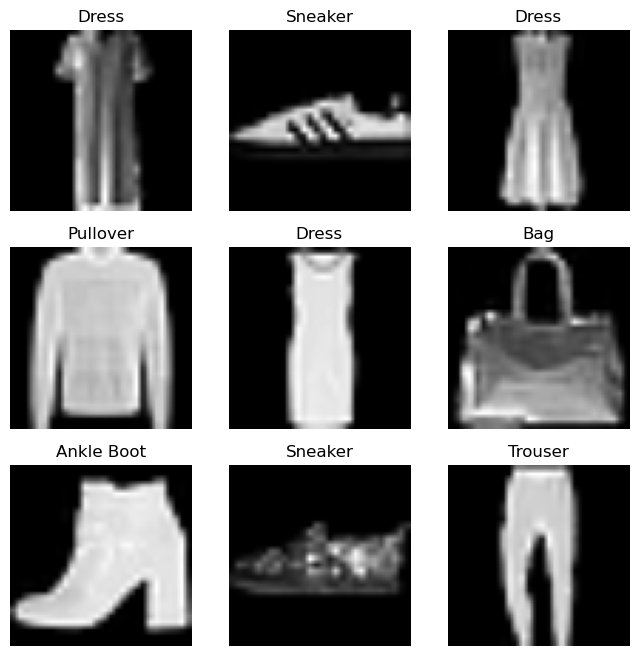

In [11]:
# 图像载入以及显示
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision import transforms 
transform=transforms.Compose([transforms.ToTensor(), transforms.Resize((64,64))])
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

current device: cpu
一个train epoch中数据长度 1000
一个test epoch中数据长度 300
##############第0次epoch#################
train loss为：2.143949508666992
test loss为：2.0031495094299316
train accuracy为：21.6%
test accuracy为：45.33333333333333%
##############第10次epoch#################
train loss为：0.5116777420043945
test loss为：0.532611072063446
train accuracy为：79.07797567507498%
test accuracy为：78.93308803381629%
##############第20次epoch#################
train loss为：0.35984566807746887
test loss为：0.40104711055755615
train accuracy为：85.88618558558399%
test accuracy为：83.59979559015785%
##############第30次epoch#################
train loss为：0.21857428550720215
test loss为：0.30638423562049866
train accuracy为：91.49129069119128%
test accuracy为：84.94314381270792%
##############第40次epoch#################
train loss为：0.14852206408977509
test loss为：0.3048940896987915
train accuracy为：94.09519359419379%
test accuracy为：83.61535488690629%
***********************fin! good luck!*******************************
The final train loss

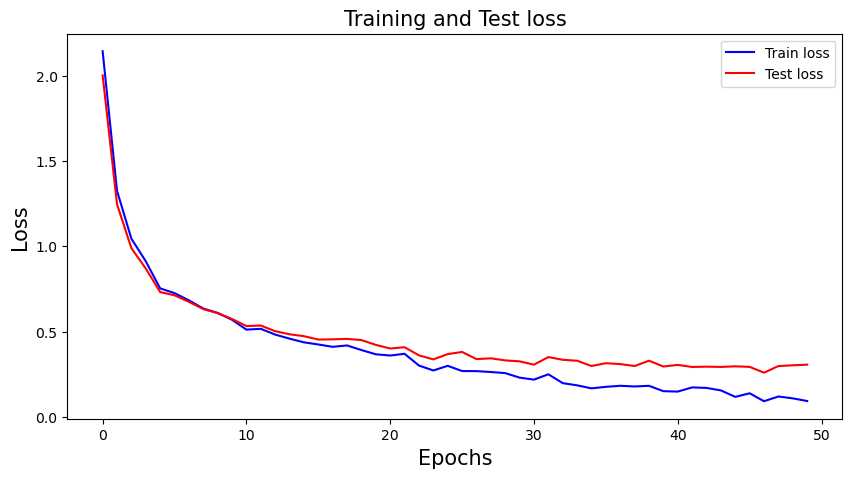

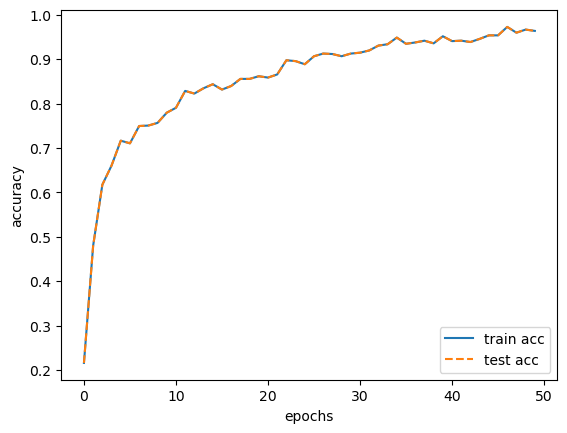

In [3]:
from sklearn.model_selection import train_test_split as split
from torch.utils.data import random_split
import torch.nn 
import myfucntion.Function as f
import torch.nn as nn 
import numpy as np
from torch import optim
from torch.utils.data import Subset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms 
import torch
 
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision import transforms 
from torch.utils.data import random_split
##############################CNN模型定义################################
# 首先定义简单的两层conn
class MyCnn1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        # 实现卷积得到feature
        self.features=nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=5,kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.Conv2d(in_channels=5,out_channels=20,kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2,2)),
        nn.Conv2d(in_channels=20,out_channels=40,kernel_size=5),
        nn.ReLU())
        #
        self.classfier=nn.Sequential(
        nn.Dropout(p=0.5),
        nn.Linear(in_features=40*9*9,out_features=256),
        nn.ReLU(),
        nn.Linear(in_features=256,out_features=128),
        nn.Dropout(p=0.5),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=10)
        )
    def forward(self,x):
        
        x=self.features(x)
    
        x=x.view(-1,40*9*9)
        x=self.classfier(x)
        return x 
    




if __name__ =="__main__":
        transform=transforms.Compose([transforms.ToTensor(), transforms.Resize((64,64))])
        train_data = datasets.FashionMNIST(
            root="data",
            train=True,
            download=True,
            transform=transform
        )

        test_data = datasets.FashionMNIST(
            root="data",
            train=False,
            download=True,
            transform=transform
        )
        ################################是否支持cuda################################
        device="cuda" if torch.cuda.is_available() else "cpu"
        print("current device: " + device)
        ################################Data set 测试集训练集划分
        ##If we want to fixed the split result, we can write the following code in the head of program:
        #train_len=int(len(train_data)*0.8)
        #test_len=int(len(train_data)-len(train_data)*0.8)
        #torch.manual_seed(0)#实现随机划分可重复
        #train_data, test_data = random_split(train_data, [train_len, test_len])
        #缩减数据量
        num_train_examples = 1000
        num_test_examples  = 300
        train_data = Subset(train_data, np.arange(num_train_examples))
        test_data = Subset(test_data, np.arange(num_test_examples))
        #################创建dataloader
        train_loader=DataLoader(dataset=train_data,batch_size=50,shuffle=False)
        test_loader=DataLoader(dataset=test_data,batch_size=50,shuffle=False)
        ##############################超参设置########################
        learning_rate=0.002
        epochs=50
        #实例化模型
        model=MyCnn1()
        model.to(device)
        #损失函数
        loss_fn=nn.CrossEntropyLoss()
        #优化函数
        opt=torch.optim.Adam(params=model.parameters(),lr=learning_rate)
        
    ################################网络实例训练################################
        train_len=len(train_loader.dataset)
        print("一个train epoch中数据长度",train_len)
        test_len=len(test_loader.dataset)
        print("一个test epoch中数据长度",test_len)
        train_loss_list=[] 
        test_loss_list=[]
        train_correct_list=[]
        test_correct_list=[]
        train_correct=0
        test_correct=0
        
        for epoch in range(epochs):
                #print("第{}次epoch".format(epoch))
                step_loss=[] #每个batch loss 对应list
                step_correct=[]#每个batch correct 对应list
                model.train()#在训练阶段使用model
                for x,y in train_loader:
                    x,y=x.to(device),y.to(device)
                    pred=model(x)
                    loss=loss_fn(pred,y)
                    opt.zero_grad()
                    loss.backward()
                    opt.step()
                    #将每一batch中loss加入loss list中#
                    step_loss.append(loss.cpu().detach().numpy())
                    # 通过比对概率最大的输出是否为target，正确则正确率加1
                    train_correct+=(pred.argmax(1)==y).type(torch.float).sum().item()
                    #step_correct=(pred.argmax(1)==y).type(torch.float).sum().item()
                    #print(step_correct/20,"%")
                train_loss=np.mean(step_loss)#计算一个epoch的平均loss
                train_loss_list.append( train_loss)#将该epoch的平均loss加入train loss list作为绘图数据
                #train_correct=np.sum(step_correct)/train_len
                train_correct/=train_len#计算该epoch的正确率
                train_correct_list.append( train_correct)#将该epoch的正确率加入train correct list作为绘图数据
                
                model.eval()
                with torch.no_grad():# since we're not training, we don't need to calculate the gradients for our outputs
                    for x,y in test_loader:
                        x,y=x.to(device),y.to(device)
                        pred=model(x)
                        loss=loss_fn(pred,y)
                        step_loss.append(loss.cpu().detach().numpy())
                        test_correct+=(pred.argmax(dim=1)==y).type(torch.float).sum().item()
                        
                test_loss=np.mean(step_loss)
                test_loss_list.append(test_loss)

                test_correct/=test_len
                test_correct_list.append( train_correct)
                
                
                
                if epoch%10==0 :
                    print("##############第{}次epoch#################".format(epoch))
                    print("train loss为：{}".format(train_loss))
                    print("test loss为：{}".format( test_loss))
                    print("train accuracy为：{}%".format(train_correct*100))
                    print("test accuracy为：{}%".format( test_correct*100))
                if epoch==epochs-1:
                    print("***********************fin! good luck!*******************************")
                    print("The final train loss：{}".format(train_loss))
                    print("The final train  loss为：{}".format( test_loss))
                    print("The final train accuracy：{}%".format( train_correct*100))
                    print("The final test accuracy：{}%".format( test_correct*100))
        f.loss_fig(train_loss_list,test_loss_list)
        f.accuracy_fig(train_correct_list,test_correct_list)
                

模型的保存与调用
[参考](https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html)

PyTorch models store the learned parameters in an internal state dictionary, called state_dict. These can be persisted via the torch.save method:

In [ ]:
print("查看模型优化后的权参、偏参")
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

state_dict保存了模型优化后的权参和偏参,通过这种方法，保存模型权参，偏参后，未来通过再次创建模型实例，载入保存参数，实现优化模型的实例化。

In [24]:
for params in model.state_dict():
    print(params, model.state_dict()[params].size())
torch.save(model.state_dict(),'saved_model/model.pth')


features.0.weight torch.Size([5, 1, 5, 5])
features.0.bias torch.Size([5])
features.3.weight torch.Size([20, 5, 5, 5])
features.3.bias torch.Size([20])
features.6.weight torch.Size([40, 20, 5, 5])
features.6.bias torch.Size([40])
classfier.1.weight torch.Size([256, 3240])
classfier.1.bias torch.Size([256])
classfier.3.weight torch.Size([128, 256])
classfier.3.bias torch.Size([128])
classfier.6.weight torch.Size([10, 128])
classfier.6.bias torch.Size([10])


实例化新的模型，载入保存的模型参数。

In [25]:
model2=MyCnn1()
params=torch.load('saved_model/model.pth')
model2.load_state_dict(params)

<All keys matched successfully>

读取本地图像，并进行预测

由于在pytorch中大量使用PIL包进行图像读取，故在opencv外需要了解PIL图像读取处理，张量化操作

In [19]:
from PIL import Image
import numpy as np 
import torch 
from torchvision import transforms

if __name__ == "__main__":
    labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
    }
    img=Image.open('pics/cloth.jpg')
    #img.show()
    img_l=img.convert('L')#实现灰度化
    #img_l.show()
    img_n=np.array(img_l)
    print(f"转换后的数组形状{img_n.shape}")
    #实现张量化,需要注意的一点是PILImage对象size属性返回的是w, h，而resize的参数顺序是h, w。
    transform=transforms.Compose([transforms.ToTensor(),transforms.Resize([64,64])])
    img_t=transform(img_l)
    print(img_t.shape)
    
    model2=MyCnn1()
    params=torch.load('saved_model/model.pth')
    model2.load_state_dict(params)
    print("实例化新的模型，并开始预测")
    pred=model2.forward(img_t)
    print(f"通过模型得到的softmax预测原始值为{pred}")
    cloth_category=pred.argmax(dim=1)
    cloth_category=cloth_category.item()#tenro转换为int
    
    print(f"预测衣服类别为{labels_map[cloth_category]}")
    
    
    

转换后的数组形状(787, 600)
torch.Size([1, 64, 64])
实例化新的模型，并开始预测
通过模型得到的softmax预测原始值为tensor([[-1.7104, -2.4992,  0.3878, -2.5923, -0.5261, -0.0514,  0.2065, -1.9907,
         -0.4990, -2.7067]], grad_fn=<AddmmBackward0>)
预测衣服类别为Pullover


In [13]:
#importing the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
x = data['data']
y = data['target']
#实现图像变为灰度图
print("shape of x: {}\nshape of y: {}".format(x.shape,y.shape))

 

shape of x: (569, 30)
shape of y: (569,)


# 使用预训练模型，进行预测